In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
(train_images,train_labesl),(test_images,test_labes) = keras.datasets.fashion_mnist.load_data()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation ='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation ='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labesl, epochs=10, validation_data=(test_images, test_labes))

Epoch 1/10


C:\Users\remit\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 61s 31ms/step - loss: 0.4396 - accuracy: 0.8422 - val_loss: 0.3390 - val_accuracy: 0.8784
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2924 - accuracy: 0.8928 - val_loss: 0.3129 - val_accuracy: 0.8813
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2484 - accuracy: 0.9072 - val_loss: 0.2924 - val_accuracy: 0.8926
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2168 - accuracy: 0.9198 - val_loss: 0.2656 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1896 - accuracy: 0.9292 - val_loss: 0.2520 - val_accuracy: 0.9089
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1699 - accuracy: 0.9357 - val_loss: 0.2585 - val_accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1477 - accuracy: 0.9441 - val_loss: 0.2620 - val_accura

In [12]:
test_loss, test_accuracy = model.evaluate(test_images, test_labes, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 - 4s - loss: 0.3135 - accuracy: 0.9010 - 4s/epoch - 12ms/step
Test accuracy: 90.10%


In [13]:
class_names=['Pullover','Coat','Bag','Ankle boot','Trouser','T-shirt/top']

1/1 [==============================] - 0s 62ms/step


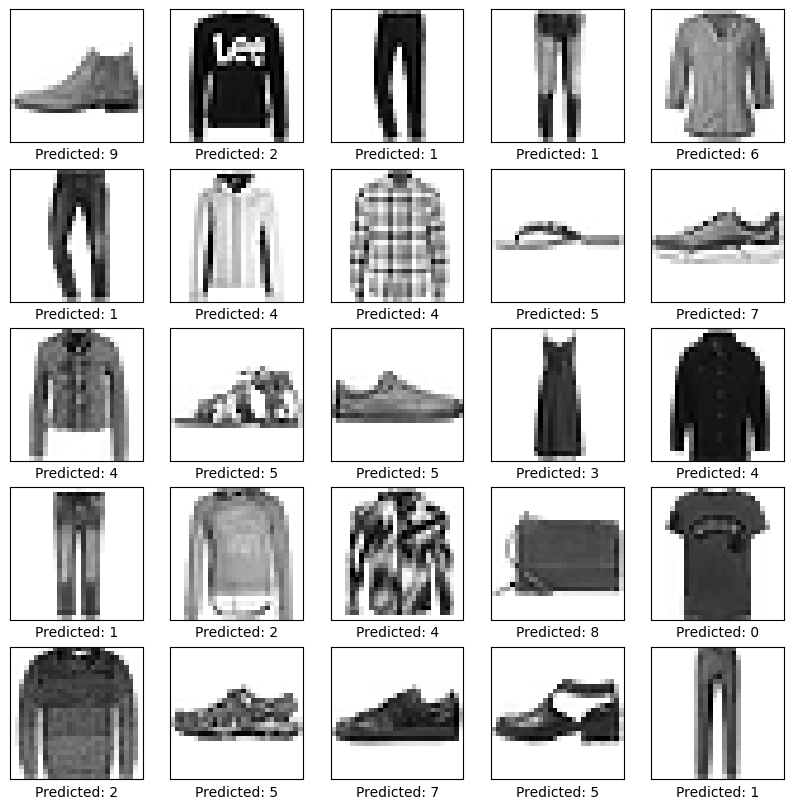

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    
    # Make predictions on test images
    predictions = model.predict(test_images[i].reshape(1, 28, 28, 1))
    predicted_label = tf.argmax(predictions, axis=1).numpy()[0]
    
    # Display the predicted label
    plt.xlabel(f'Predicted: {predicted_label}')
    
plt.show()